In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt

**Discrete - Stochastic - Value function iteration**

In [5]:
beta = 0.9  # discount factor
nk = 50     # capital grid points
delta = 0   # depreciation rate

eps = 1e-5          # convergence criterion
max_iter = 10000    # maximum number of iterations

In [6]:
def utility(c):
    u = math.log(c)
    return u

In [7]:
def solve_model(beta, nk, delta, eps, max_iter):

    kgrid = np.linspace(0.001, 1, nk)  # capital grid
    fk = np.zeros((nk, 2))  # production

    # Production conditional on capital and shock
    fk[:, 0] = 0.9 * kgrid ** 0.3 + 0.3 * kgrid
    fk[:, 1] = 1.1 * kgrid ** 0.3 + 0.9 * kgrid

    # Initial guess for value function:
    V = np.zeros((nk, 2))

    # Arrays to store
    # (1) the updated value function
    Vnew = np.zeros_like(V)

    # (2) the expected future value function (expectation over shock)
    EV = np.zeros((nk))

    # Decision on consumption and investment conditional on capital and shock
    pol_c = np.zeros((nk, 2))
    pol_i = np.zeros((nk, 2))

    crit = 1  # initialize crit to 1
    iter = 0  # initialize iteration number to 0

    while crit > eps and iter < max_iter:

        # Computed expected future value
        for k in range(nk):
            EV[k] = beta * (0.5 * V[k, 0] + 0.5 * V[k, 1])

        # Loop over all current values of capital and the shock:
        for k in range(nk):
            for s in range(2):

                # Maximal amount of consumption (for zero savings)
                max_c = fk[k, s] + (1 - delta) * kgrid[k]

                # Find optimal choice for consumption
                max_u = 0   # best utility value found so far
                idx = 0     # index of current best choice for consumption

                # Try out all possible values of consumption...
                for kprime in range(nk):   # kprime (k_(t+1) is the capital of next period)
                    consumption = max_c - kgrid[kprime]

                    if consumption <= 0:   # ... as long as consumption is non-negative
                        break    # if it's negative, abort the search (break the for loop)

                    else:
                        u = utility(consumption) + EV[kprime]    # utility from consuming now and future expected value

                        if u > max_u or kprime == 0:    # if utility from this consumption choice is higher then the best one found so far, save current choice as the best
                            max_u = u
                            idx = kprime

                Vnew[k, s] = max_u    # update value function with the best utility found
                pol_i[k, s] = kgrid[idx]    # also save investment choice
                pol_c[k, s] = max_c - kgrid[idx]    # and consumption choice

        crit = np.max(np.abs(V - Vnew))    # distance between old and new value function
        V = np.copy(Vnew)   # perform the update of the value function

        iter += 1

    model = {}
    model['iter'] = iter
    model['crit'] = crit
    model['V'] = V
    model['pol_c'] = pol_c
    model['pol_i'] = pol_i
    model['kgrid'] = kgrid
    model['fk'] = fk

    return model

In [8]:
def plot_policy(model):

    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.plot(model['kgrid'], model['pol_i'][:, 0], label='Low')
    plt.plot(model['kgrid'], model['pol_i'][:, 1], label='High')
    plt.title('Investment')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(model['kgrid'], model['pol_c'][:, 0], label='Low')
    plt.plot(model['kgrid'], model['pol_c'][:, 1], label='High')
    plt.legend()
    plt.title('Consumption')

    plt.subplot(1, 3, 3)
    plt.plot(model['kgrid'], model['V'][:, 0], label='Low')
    plt.plot(model['kgrid'], model['V'][:, 1], label='High')
    plt.legend()
    plt.title('Value function')
    plt.show()

**Solution 1**

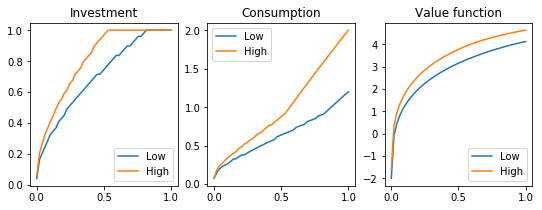

In [10]:
nk = 50
model1 = solve_model(beta, nk, delta, eps, max_iter)
plot_policy(model1)

**Solution 2**

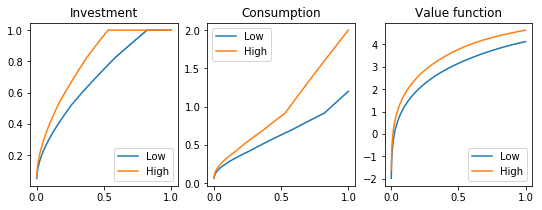

In [17]:
nk = 500
model2 = solve_model(beta, nk, delta, eps, max_iter)
plot_policy(model2)